In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#generating some data
X,y = make_blobs(n_samples=100,centers=3)

In [3]:
  type(X)

numpy.ndarray

In [4]:
X[0:9,:]

array([[-5.06024096, -2.88080635],
       [-5.98635271, -3.21339792],
       [-4.34208737, -1.16034047],
       [-4.49376526, -1.16021247],
       [-4.39216745, -1.9784352 ],
       [-6.63960461, -1.42137344],
       [-4.8086304 , -5.11671913],
       [-4.93484725,  0.29353692],
       [-6.06716972, -1.8337141 ]])

In [5]:
y

array([0, 1, 0, 2, 0, 1, 1, 2, 2, 0, 1, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 2,
       1, 0, 2, 2, 1, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2,
       0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 0, 1, 0, 2, 0,
       0, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 2, 1, 2, 1])

In [6]:
A = sns.load_dataset('iris')
A.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
#150 samples in data for four features
A.shape

(150, 5)

In [8]:
A.iloc[60:65]

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,3.5,1.0,versicolor
61,5.9,3.0,4.2,1.5,versicolor
62,6.0,2.2,4.0,1.0,versicolor
63,6.1,2.9,4.7,1.4,versicolor
64,5.6,2.9,3.6,1.3,versicolor


In [9]:
 C = pd.read_csv(r"/home/mitraa/Jupyter Notebook/Datascience practices/CSV files/Bias_correction_ucl.csv")

In [10]:
C.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30/06/2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30/06/2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30/06/2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30/06/2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30/06/2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [11]:
C.shape

(7752, 25)

# Regression

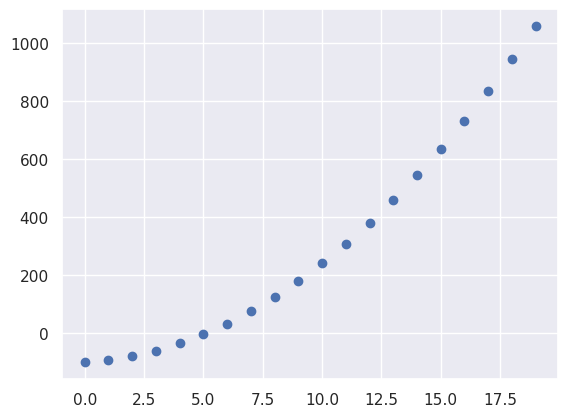

In [12]:
n = 20
X = np.arange(n) # X is the feature
y = 4*X + 3*(X**2)-100 # y is the target and that's a mapping between X and y
plt.scatter(X,y)

In [13]:
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [14]:
y

array([-100,  -93,  -80,  -61,  -36,   -5,   32,   75,  124,  179,  240,
        307,  380,  459,  544,  635,  732,  835,  944, 1059])

In [15]:
from sklearn.linear_model import LinearRegression

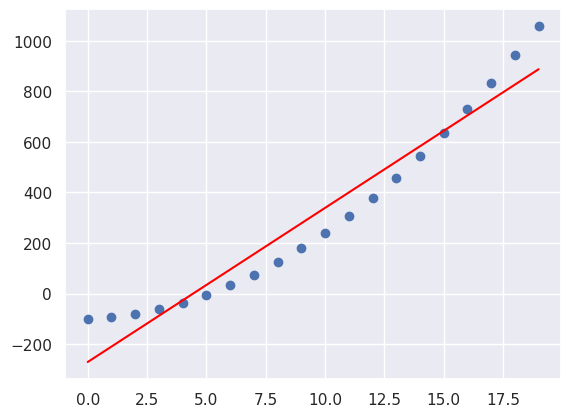

In [16]:
#buildinng a model 
m = LinearRegression()#the model
m.fit(X[:,np.newaxis],y)
y_pred = m.predict(X[:,np.newaxis])
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

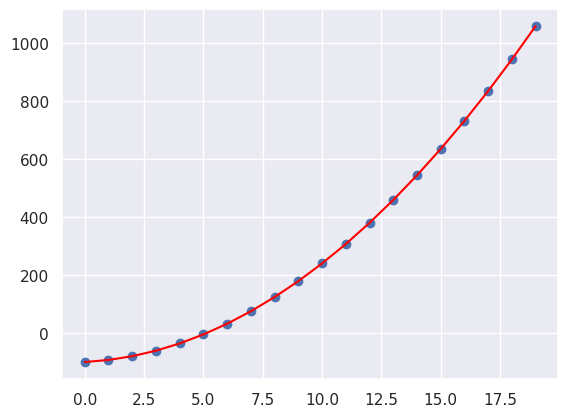

In [17]:
# to make model more flexible
from sklearn.preprocessing import PolynomialFeatures

#transforing to the neaw features
polyModel = PolynomialFeatures(degree=2, include_bias=True)
X_poly = polyModel.fit_transform(X[:,np.newaxis])

m = LinearRegression()#the model
m.fit(X_poly,y)
y_pred = m.predict(X_poly)
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

In [18]:
# the 4 is for X and 3 is for X and 100 shown as 0
m.coef_

array([0., 4., 3.])

# Classification

In [19]:
X = sns.load_dataset('iris')
y = X.species

In [20]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [21]:
x = X.drop(columns={'species'})
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
x.shape

(150, 4)

In [23]:
y.shape

(150,)

In [24]:
#trainig data
from sklearn.svm import SVC

In [25]:
m = SVC(gamma='auto')
m.fit(x,y)

SVC(gamma='auto')

In [26]:
y_pred = m.predict(x)

In [27]:
y_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica

In [28]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

# Clustering

In [29]:
from sklearn.datasets import make_blobs

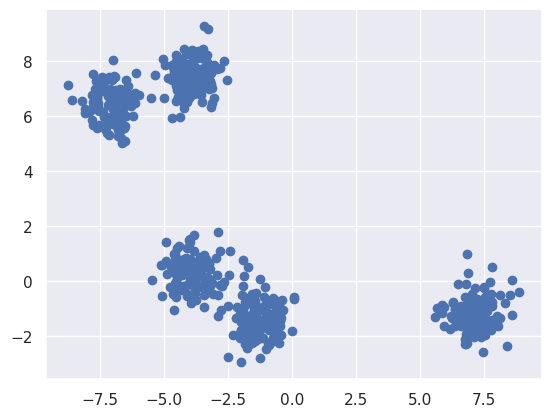

In [30]:
X,y = make_blobs(n_samples=600, centers=5, cluster_std=0.6)
plt.scatter(X[:,0],X[:,1])

In [31]:
X.shape

(600, 2)

In [32]:
from sklearn.cluster import KMeans

In [33]:
kmeans = KMeans(n_clusters=5)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9af03e65e0>
Traceback (most recent call last):
  File "/home/mitraa/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/mitraa/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/mitraa/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/mitraa/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.mat

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9af03e65e0>
Traceback (most recent call last):
  File "/home/mitraa/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/mitraa/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/mitraa/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/mitraa/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.mat

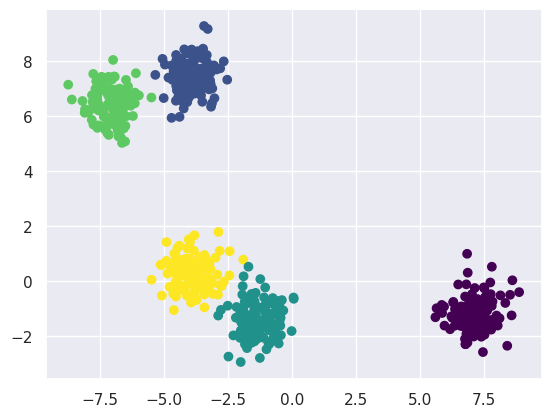

In [34]:
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred,cmap="viridis")

# Data Preparatioon 

In [35]:
#Prediction task is to determine whether a person makes over 50k a yaer:
X = pd.read_csv(r"/home/mitraa/Jupyter Notebook/Datascience practices/CSV files/adult data",header=None)

In [36]:
X.shape

(32561, 15)

In [37]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [38]:
X2 = pd.get_dummies(X,columns=[1,3,5,6,7,8,9,13])
X2.head()

,0,2,4,10,11,12,14,1_ ?,1_ Federal-gov,1_ Local-gov,...,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X2.shape

(32561, 109)

In [40]:
y = X2.loc[:,14]
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: 14, Length: 32561, dtype: object

In [41]:
vals = np.unique(y)
vals

array([' <=50K', ' >50K'], dtype=object)

In [42]:
idx = X2.loc[:,14]==vals[0]
idx

0         True
1         True
2         True
3         True
4         True
         ...  
32556     True
32557    False
32558     True
32559     True
32560    False
Name: 14, Length: 32561, dtype: bool

In [43]:
X2.loc[idx,:] = 0
X2.loc[~idx,:] = 1
np.unique(X2.loc[:,14])

array([0, 1], dtype=object)

In [44]:
X2.head()

,0,2,4,10,11,12,14,1_ ?,1_ Federal-gov,1_ Local-gov,...,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
X2.to_csv("abc.csv")

In [46]:
#scaling the data
from sklearn.preprocessing import StandardScaler

In [47]:
#200 samples and 4 features
X = 100*np.random.rand(200,4)+55

In [48]:
#checking the center
X.mean(axis=0)

array([104.65598098, 104.64421023, 105.98005945, 108.57529943])

In [49]:
X.std(axis=0)

array([29.53777566, 28.27237198, 27.7813338 , 30.07760958])

In [50]:
s = StandardScaler()
X_scaled = s.fit_transform(X)

In [51]:
X_scaled.mean(axis=0)

array([ 3.96072064e-15,  2.47579734e-16,  8.87623308e-16, -5.86197757e-16])

In [52]:
X_scaled.std(axis=0)

array([1., 1., 1., 1.])